# REGRESSION EV FİYATLARINI TAHMİN ETME


## VERİYİ AL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [2]:
df=pd.read_csv("kc_house_data.csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19578,795002450,20150430T000000,270950.0,2,1.00,780,6250,1.0,0,0,...,6,780,0,1942,0,98168,47.5099,-122.330,1280,7100
1799,5312100060,20141111T000000,465000.0,4,2.50,2200,3141,2.0,0,0,...,7,2060,140,1994,0,98144,47.5726,-122.305,1660,3175
19376,8079010220,20141117T000000,440000.0,4,2.50,2350,7203,2.0,0,0,...,8,2350,0,1989,0,98059,47.5123,-122.151,2260,7274
3330,1765100025,20150202T000000,253000.0,3,2.25,1440,9806,1.0,0,0,...,7,1440,0,1965,0,98030,47.3857,-122.212,1590,9782
6410,561500290,20140711T000000,315000.0,3,1.75,1660,37642,1.0,0,0,...,7,1660,0,1991,0,98022,47.2559,-122.007,2070,54450
18901,9324800025,20141125T000000,325500.0,3,1.50,1540,8110,1.0,0,0,...,7,1190,350,1959,0,98125,47.7329,-122.291,1290,8110
8658,3298700941,20140905T000000,260000.0,3,1.00,1200,4592,1.0,0,0,...,6,800,400,1950,0,98106,47.5190,-122.352,940,4440
1178,7893800335,20150430T000000,328000.0,4,3.25,3380,7500,2.0,0,3,...,7,2420,960,1990,0,98198,47.4092,-122.330,1920,7500
1020,7701990560,20140729T000000,840000.0,4,2.75,3130,21810,2.0,0,0,...,10,3130,0,1993,0,98077,47.7083,-122.073,3330,21810
9671,1088700100,20141118T000000,905000.0,3,2.50,2930,9280,2.0,0,0,...,10,2930,0,1988,0,98007,47.6335,-122.151,2730,10090


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

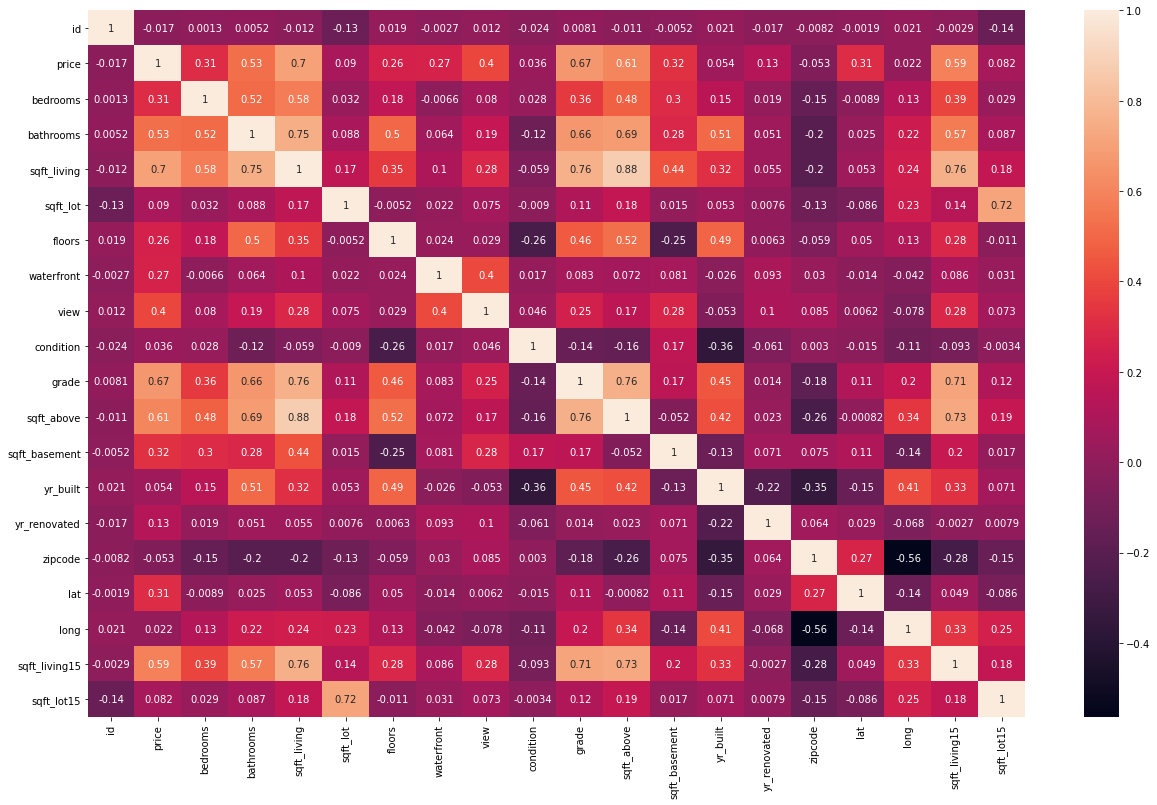

In [10]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(),annot=True);

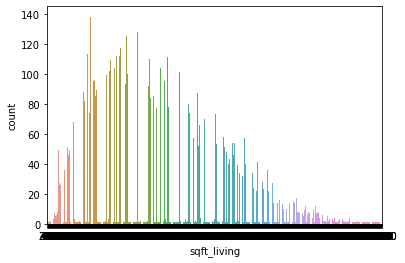

In [11]:
sns.countplot(df.sqft_living);

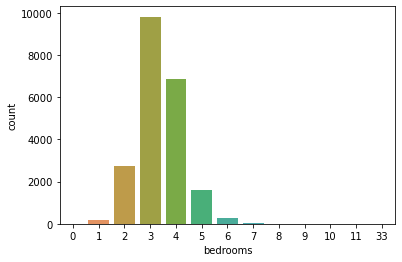

In [12]:
sns.countplot(df.bedrooms);

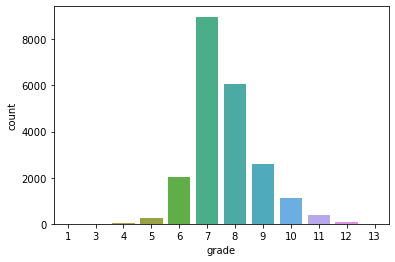

In [13]:
sns.countplot(df.grade);

In [14]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [15]:
df.grade.unique().max()

13

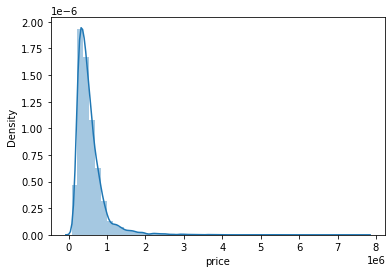

In [16]:
sns.distplot(df.price.sort_values());

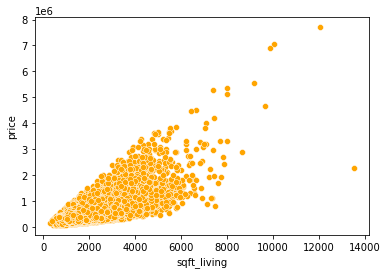

In [17]:
sns.scatterplot(x=df.sqft_living,y=df.price,color="orange");

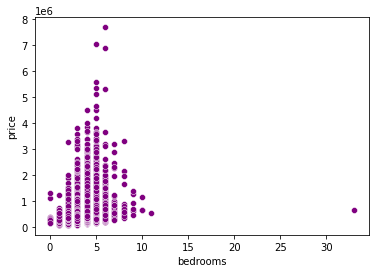

In [18]:
sns.scatterplot(x=df.bedrooms,y=df.price,color="purple");

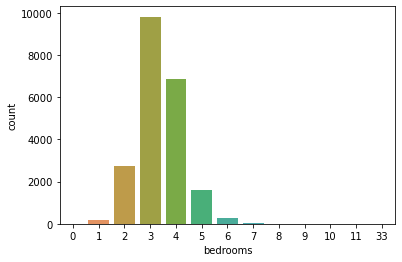

In [19]:
sns.countplot(df.bedrooms);

In [20]:
df.bedrooms.max()

33

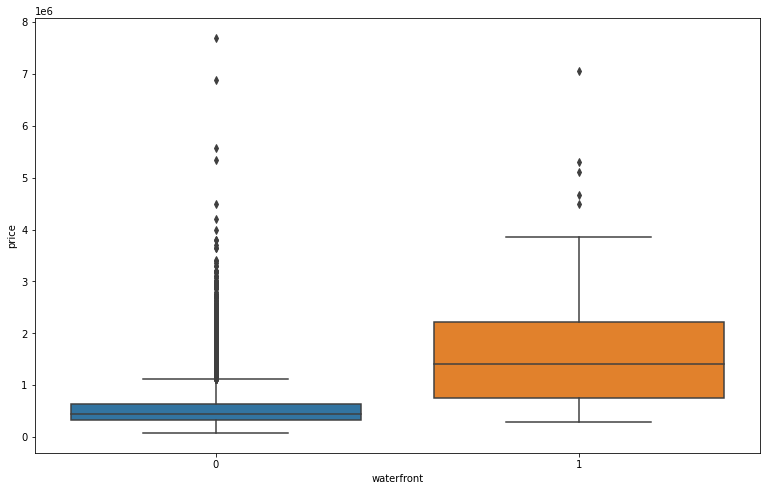

In [21]:
plt.figure(figsize=(13,8))
sns.boxplot(x="waterfront",y="price",data=df);

In [ ]:
sns.pairplot(data=df);

In [6]:
x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","bedrooms","lat","waterfront","floors"]]

In [7]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0


In [25]:
x.shape

(21613, 11)

In [8]:
y=df[["price"]]

In [27]:
y.shape

(21613, 1)

In [28]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [29]:
y.sample(5)

,price
11279,370000.0
17697,399500.0
1315,5300000.0
15114,299000.0
17077,350000.0


In [9]:
from sklearn.linear_model import LinearRegression # Science Kit Learn
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#train_size=0.8
print("Values in x_train ",x_train)
print("Values in y_train",y_train)

Values in x_train         sqft_living  grade  sqft_above  sqft_living15  bathrooms  view  \
6325          1780      9        1780           2750       1.75     0   
13473         1000      6         800           1270       1.00     0   
17614         1080      6         990           1170       1.00     0   
16970         2090      7        1280           1800       2.25     0   
20868         1741      8        1446           2090       2.50     0   
...            ...    ...         ...            ...        ...   ...   
11964         1000      7        1000           1000       1.50     0   
21575         3087      8        3087           2927       2.50     0   
5390          2120      7        2120           1690       2.50     0   
860            380      5         380           1170       0.75     0   
15795         3130      7        3130           3020       2.50     0   

       sqft_basement  bedrooms      lat  waterfront  floors  
6325               0         3  47.3670   

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 11), (4323, 11), (17290, 1), (4323, 1))

In [11]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)



In [12]:
y_pretest=lr.predict(x_test)
y_pretest

array([[ 434409.29933934],
       [ 758733.88851383],
       [1226576.91945735],
       ...,
       [ 402463.30951606],
       [ 601585.92185805],
       [ 424198.83821682]])

In [13]:
from sklearn.metrics import mean_squared_error,r2_score


In [14]:
(mean_squared_error(y_test,y_pretest))**0.5

226245.77173330766

In [15]:
r2_score(y_test,y_pretest)

0.6614085035780478

In [16]:
x,y=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","bedrooms","lat","waterfront","floors","zipcode"]],df[["price"]]

In [17]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,zipcode
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0,98178
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0,98125
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0,98028
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0,98136
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0,98074


In [18]:
x=pd.get_dummies(x,drop_first=True)#kukla değişken
df.zipcode=df.zipcode.astype("category")

In [19]:
x.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,zipcode
0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0,98178
1,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0,98125
2,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0,98028
3,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0,98136
4,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0,98074


In [20]:
x.sample(5)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,zipcode
6409,2560,8,1380,1780,2.00,1,1180,3,47.5506,0,1.0,98136
4018,1540,7,1540,2027,1.00,0,0,4,47.4163,0,1.5,98031
5350,1320,7,1320,1010,1.00,0,0,3,47.5288,0,1.5,98108
3602,1090,6,980,2160,1.00,0,110,1,47.6999,0,1.0,98117
16382,1630,7,1230,1550,2.25,2,400,3,47.7273,0,1.0,98034


In [21]:
x.describe()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2079.899736,7.656873,1788.390691,1986.552492,2.114757,0.234303,291.509045,3.370842,47.560053,0.007542,1.494309,98077.939805
std,918.440897,1.175459,828.090978,685.391304,0.770163,0.766318,442.575043,0.930062,0.138564,0.086517,0.539989,53.505026
min,290.000000,1.000000,290.000000,399.000000,0.000000,0.000000,0.000000,0.000000,47.155900,0.000000,1.000000,98001.000000
25%,1427.000000,7.000000,1190.000000,1490.000000,1.750000,0.000000,0.000000,3.000000,47.471000,0.000000,1.000000,98033.000000
50%,1910.000000,7.000000,1560.000000,1840.000000,2.250000,0.000000,0.000000,3.000000,47.571800,0.000000,1.500000,98065.000000
75%,2550.000000,8.000000,2210.000000,2360.000000,2.500000,0.000000,560.000000,4.000000,47.678000,0.000000,2.000000,98118.000000
max,13540.000000,13.000000,9410.000000,6210.000000,8.000000,4.000000,4820.000000,33.000000,47.777600,1.000000,3.500000,98199.000000


In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21613 non-null  int64  
 1   grade          21613 non-null  int64  
 2   sqft_above     21613 non-null  int64  
 3   sqft_living15  21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   view           21613 non-null  int64  
 6   sqft_basement  21613 non-null  int64  
 7   bedrooms       21613 non-null  int64  
 8   lat            21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  floors         21613 non-null  float64
 11  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.0 MB


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=13)#train_size=0.8

In [24]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pretest=LR.predict(x_test)
y_pretest

array([[366973.6621883 ],
       [136355.24212804],
       [162189.93834625],
       ...,
       [274629.72196192],
       [922345.72397891],
       [399096.69836157]])

In [26]:
(mean_squared_error(y_test,y_pretest))**0.5

215149.78851631965

In [27]:
r2_score(y_test,y_pretest)

0.6708672031708884

In [28]:
print(LR.coef_)

[[-1.10721832e+14  8.28211719e+04  1.10721832e+14  5.39843750e+00
  -3.28817441e+03  6.53178211e+04  1.10721832e+14 -2.55066449e+04
   6.77370674e+05  5.98840142e+05 -2.99705540e+04 -2.94958496e+01]]


In [51]:
## MSE ve r2 score düşük çıktı parametreleri değiştirip tekrar yapacağım.


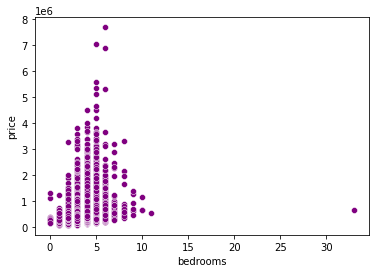

In [52]:
sns.scatterplot(x=df.bedrooms,y=df.price,color="purple");

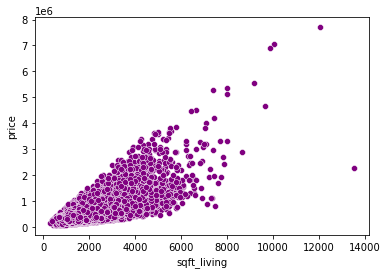

In [53]:
sns.scatterplot(x=df["sqft_living"],y=df["price"],color="purple");

In [29]:
df["bedrooms"]=df[df["bedrooms"]<10]
df["sqft_living"]=df[df["sqft_living"]<8000]




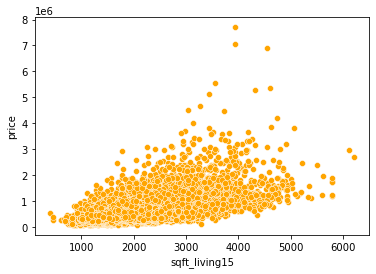

In [55]:
sns.scatterplot(x=df["sqft_living15"],y=df["price"],color="orange");

In [30]:
df["sqft_living15"]=df[df["sqft_living15"]<5000]

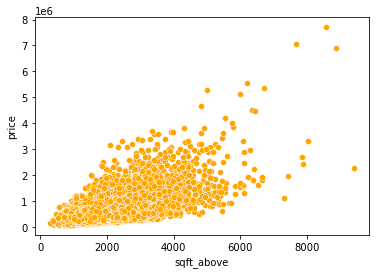

In [31]:
sns.scatterplot(x=df["sqft_above"],y=df["price"],color="orange");

In [32]:
df["sqft_above"]=df[df["sqft_above"]<6000]

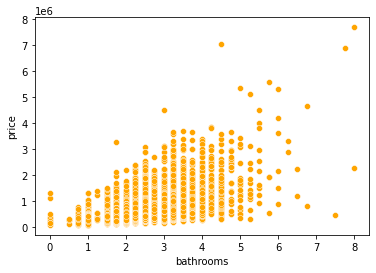

In [59]:
sns.scatterplot(x=df["bathrooms"],y=df["price"],color="orange");

In [33]:
df["bathrooms"]=df[df["bathrooms"]<7]

In [34]:
df["view"]=df[df["view"]==0]
df["waterfront"]=df[df["waterfront"]==0]

In [35]:
df.bedrooms=df.bedrooms**2
df.bathrooms=df.bathrooms**2
df.grade=df.grade/2

In [37]:
df["age"]=2021-df.yr_built
df["sqft"]=df.sqft_above+df.sqft_living+df.sqft_living15+df.sqft_basement
df.sqft=df.sqft**2


In [38]:
x,y=df[["sqft","grade","bathrooms","view","bedrooms","lat","waterfront","floors","zipcode","age"]],df[["price"]]

In [ ]:
x.info()

In [40]:
x=pd.get_dummies(x,drop_first=True)#kukla değişken
df.zipcode=df.zipcode.astype("category")


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)#train_size=0.8

In [ ]:
LR_1=LinearRegression()
regmodel=LR_1.fit(x_train,y_train)

In [45]:
y_pretest=regmodel.predict(x_test)##hocam bu hatayı bir ürlü çözemedim daha önce de memory error vermişti 3 4 kez bilgisayar durdu hatta bilgisayarı kapatmak zorunda kaldım.
y_pretest

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 104873)

In [46]:
(mean_squared_error(y_test,y_pretest))**0.5

215149.78851631965

In [47]:
r2_score(y_test,y_pretest)

0.6708672031708884

## LINEAR REGRESSION

## RIDGE AND LASSO

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
R=Ridge()
R.fit(x_train,y_train)
y_pred_ridge=R.predict(x_test)

In [ ]:
y_pred_ridge

In [ ]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

In [ ]:
r2_score(y_test,y_pred_ridge)

# LASSO REGRESSION 

In [ ]:
L=Lasso()
L.fit(x_train,y_train)
y_pred_lasso=L.predict(x_test)

In [ ]:
y_pred_lasso

In [ ]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

In [ ]:
r2_score(y_test,y_pred_lasso)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
E=ElasticNet(l1_ratio=.8)

In [ ]:
E.fit(x_train,y_train)

In [ ]:
E_pred_elastic=E.predict(x_test)

In [ ]:
E_pred_elastic

In [ ]:
(mean_squared_error(y_test,E_pred_elastic))**0.5

In [ ]:
r2_score(y_test,E_pred_elastic)